# Health Data synthesis Analysis

The purpose of this notebook is to use several synthetic creation tools for creating synthetic healthcare data and analyse the results and compare them through systematic evaluation methods. Several Datasets from [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=life&numAtt=&numIns=&type=&sort=dateDown&view=table) will be used in order to assess with different data and tools 

## Datasets used
* [Coimbra Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)
* [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
* [Diabetes 130-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)
* ~~[Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) ~~
* ~~[HCV data Data Set](https://archive.ics.uci.edu/ml/datasets/HCV+data)~~
* ~~[Cervical cancer (Risk Factors) Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/00383/)~~
* ~~[Lung Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Lung+Cancer)~~


## Tools Used
* CTGAN - creating
* SDGYM - creating
* SDV - evaluating
* table-evaluator - evaluating

In [2]:
#imports
from ctgan import load_demo
from ctgan import CTGANSynthesizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

0.11.0
0.25.3
1.17.5


## CTGAN

### Coimbra Breast Cancer

In [4]:
cbc=pd.read_csv("data/dataR2 (2).csv")
cbc.shape
cbc.dtypes
cbc.head(5)
cbc_discrete_columns = ['Classification']

(116, 10)

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
ctgan_model = CTGANSynthesizer()
np.random.seed(42)
torch.manual_seed(42)
ctgan_model.fit(cbc, cbc_discrete_columns,epochs=200)
cbc_synth = ctgan_model.sample(cbc.shape[0])
cbc_concatenated = pd.concat([cbc.assign(dataset='original'), cbc_synth.assign(dataset='sinthetic')])

Epoch 1, Loss G: 0.7030, Loss D: -0.0071
Epoch 2, Loss G: 0.7077, Loss D: 0.0476
Epoch 3, Loss G: 0.6982, Loss D: -0.0063
Epoch 4, Loss G: 0.7176, Loss D: 0.0150
Epoch 5, Loss G: 0.6958, Loss D: -0.0172
Epoch 6, Loss G: 0.6794, Loss D: -0.0433
Epoch 7, Loss G: 0.6914, Loss D: -0.0606
Epoch 8, Loss G: 0.7012, Loss D: -0.0846
Epoch 9, Loss G: 0.6912, Loss D: -0.1116
Epoch 10, Loss G: 0.6969, Loss D: -0.1300
Epoch 11, Loss G: 0.6823, Loss D: -0.0996
Epoch 12, Loss G: 0.6663, Loss D: -0.1639
Epoch 13, Loss G: 0.6601, Loss D: -0.1988
Epoch 14, Loss G: 0.6328, Loss D: -0.2172
Epoch 15, Loss G: 0.6135, Loss D: -0.1912
Epoch 16, Loss G: 0.5949, Loss D: -0.2572
Epoch 17, Loss G: 0.6139, Loss D: -0.3076
Epoch 18, Loss G: 0.5229, Loss D: -0.3838
Epoch 19, Loss G: 0.5151, Loss D: -0.3574
Epoch 20, Loss G: 0.4860, Loss D: -0.3448
Epoch 21, Loss G: 0.4678, Loss D: -0.3727
Epoch 22, Loss G: 0.4354, Loss D: -0.4143
Epoch 23, Loss G: 0.3657, Loss D: -0.4334
Epoch 24, Loss G: 0.3747, Loss D: -0.3333
Epo

Epoch 192, Loss G: -0.8821, Loss D: -0.0769
Epoch 193, Loss G: -1.0114, Loss D: 0.1785
Epoch 194, Loss G: -0.8734, Loss D: 0.0450
Epoch 195, Loss G: -0.8948, Loss D: 0.0391
Epoch 196, Loss G: -0.8735, Loss D: 0.0217
Epoch 197, Loss G: -0.8726, Loss D: 0.1683
Epoch 198, Loss G: -0.8126, Loss D: -0.0925
Epoch 199, Loss G: -0.8291, Loss D: 0.0580
Epoch 200, Loss G: -0.7241, Loss D: -0.0725


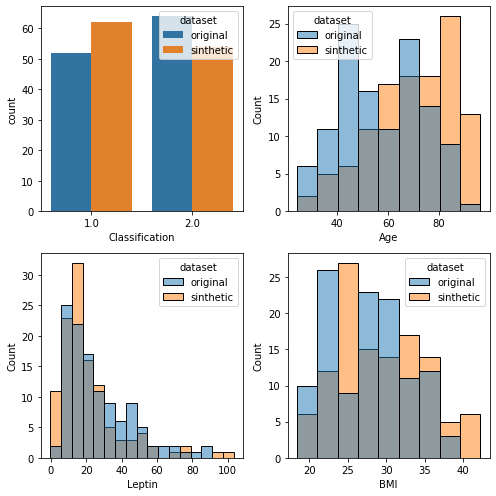

In [7]:
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.countplot(x="Classification", data=cbc_concatenated,hue='dataset',ax=axes[0, 0])
sns.histplot(data=cbc_concatenated, x="Age", hue="dataset",ax=axes[0, 1])
sns.histplot(data=cbc_concatenated, x="Leptin", hue='dataset',ax=axes[1, 0])
sns.histplot(data=cbc_concatenated, x="BMI", hue='dataset',ax=axes[1, 1])
plt.tight_layout()

In [8]:
#sns.pairplot(cbc_concatenated, hue="dataset",kind="kde")

In [9]:
#sdv evaluation metrics
from sdv.evaluation import evaluate

sdv_cbc_eval=evaluate(cbc_synth, cbc, aggregate=False)
sdv_cbc_eval

C:\Users\joaof\Miniconda3\envs\synth\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\joaof\Miniconda3\envs\synth\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'cstest': nan,
 'kstest': 0.13953514422720062,
 'logistic_detection': 0.8128135921658188,
 'svc_detection': 0.8447725988211818}

Metrics meaning:

* **cstest**: This metric compares the distributions of all the categorical columns of the table by using a Chi-squared test and returns the average of the p-values obtained across all the columns. If the tables that you are evaluating do not contain any categorical columns the result will be nan.
* **kstest**: This metric compares the distributions of all the numerical columns of the table with a two-sample Kolmogorov–Smirnov test using the empirical CDF and returns the average of the p-values obtained across all the columns. If the tables that you are evaluating do not contain any numerical columns the result will be nan.
* **logistic_detection**: This metric tries to use a Logistic Regression classifier to detect whether each row is real or synthetic and then evaluates its performance using an Area under the ROC curve metric.
* **svc_detection**: This metric tries to use an Support Vector Classifier to detect whether each row is real or synthetic and then evaluates its performance using an Area under the ROC curve metric.

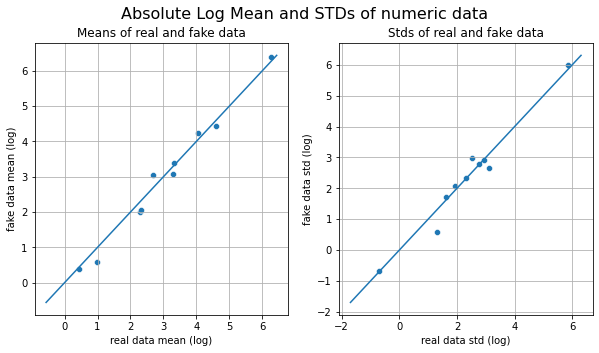

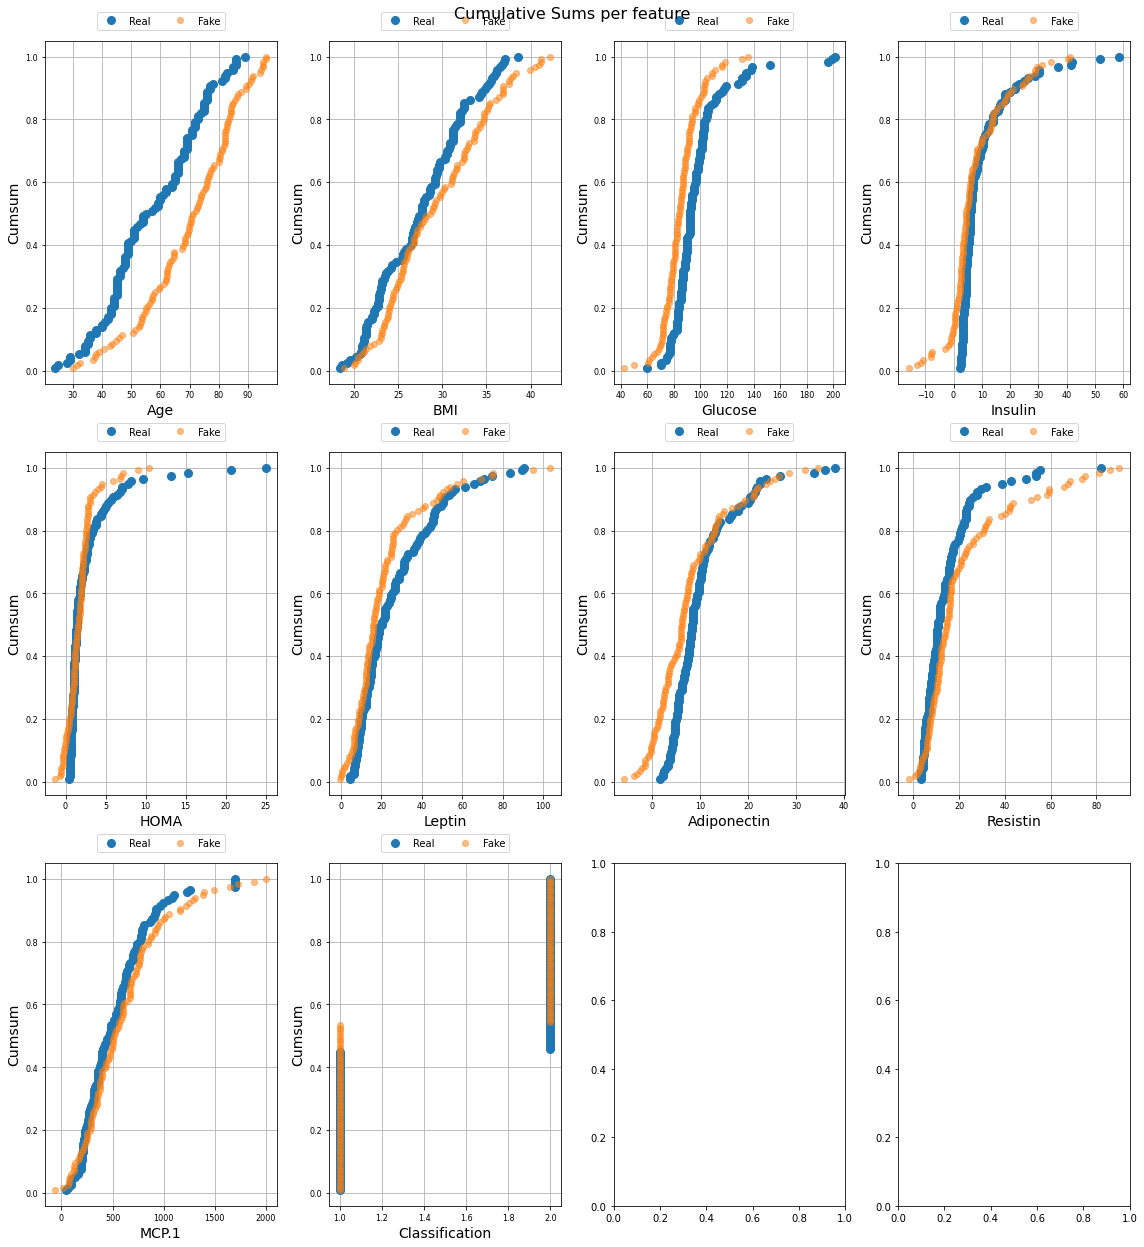

C:\Users\joaof\Miniconda3\envs\synth\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joaof\Miniconda3\envs\synth\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joaof\Miniconda3\envs\synth\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

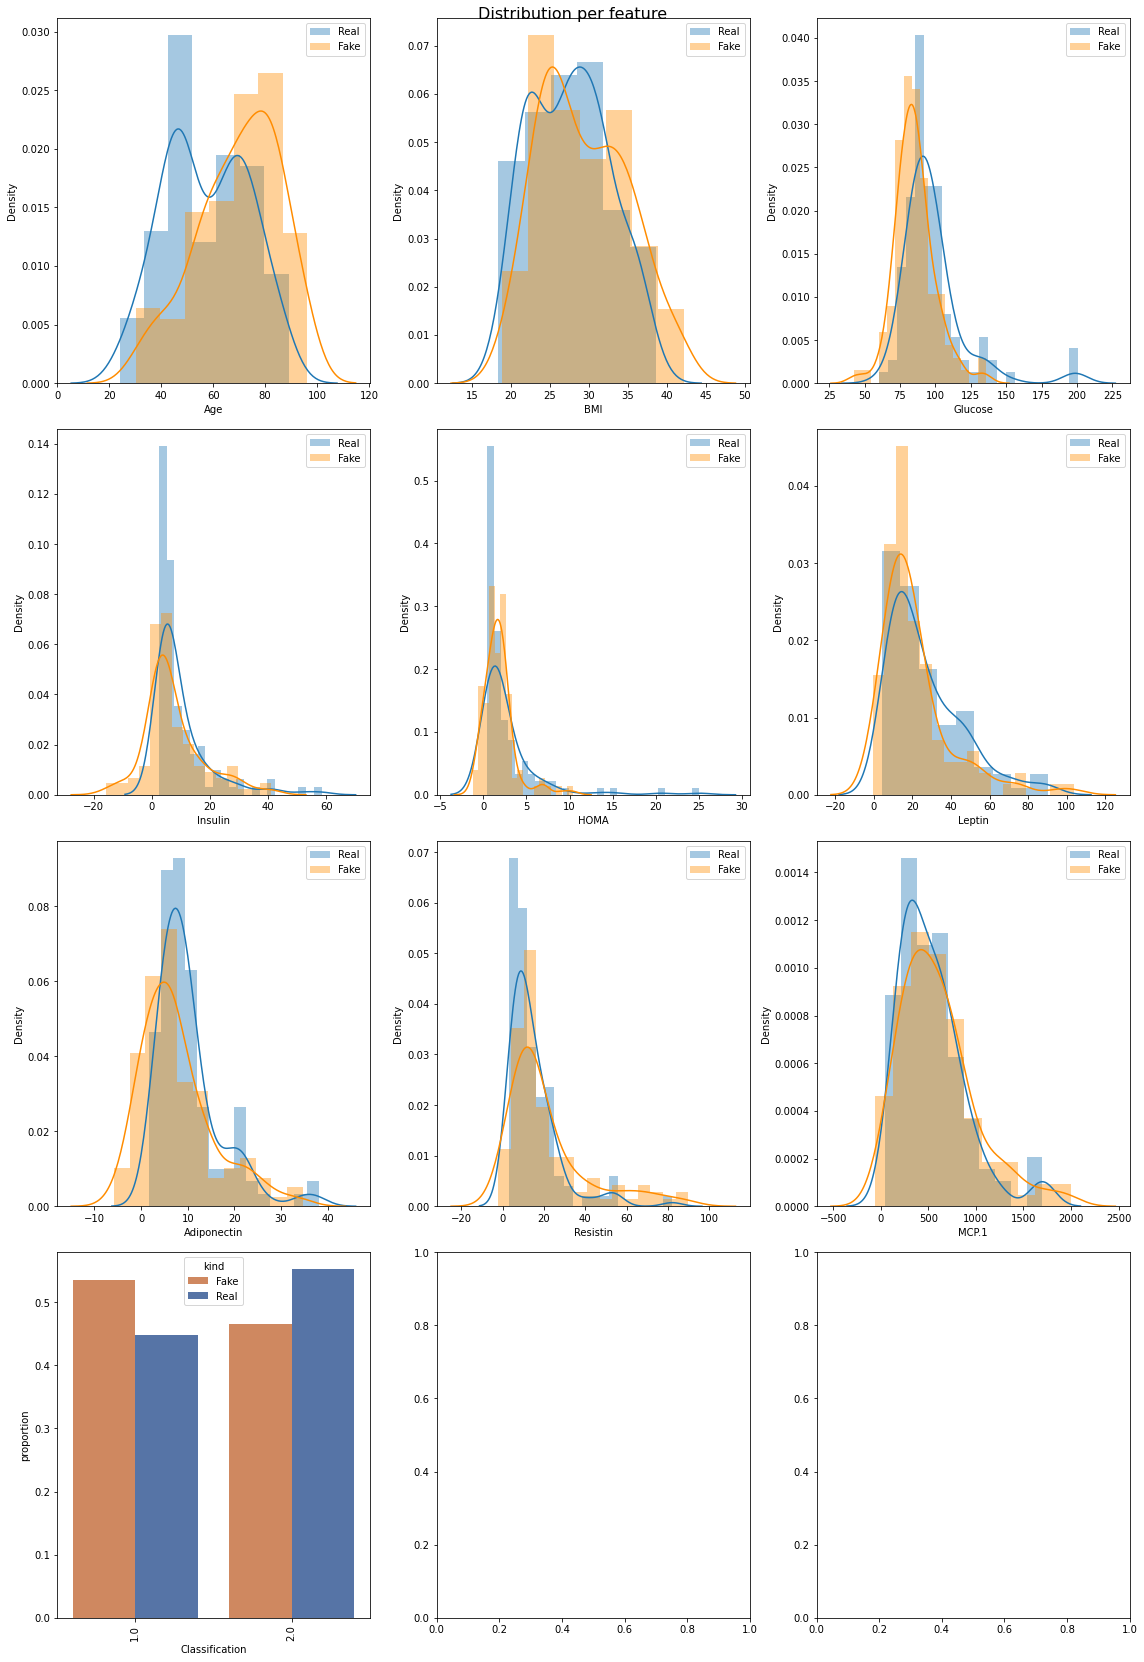

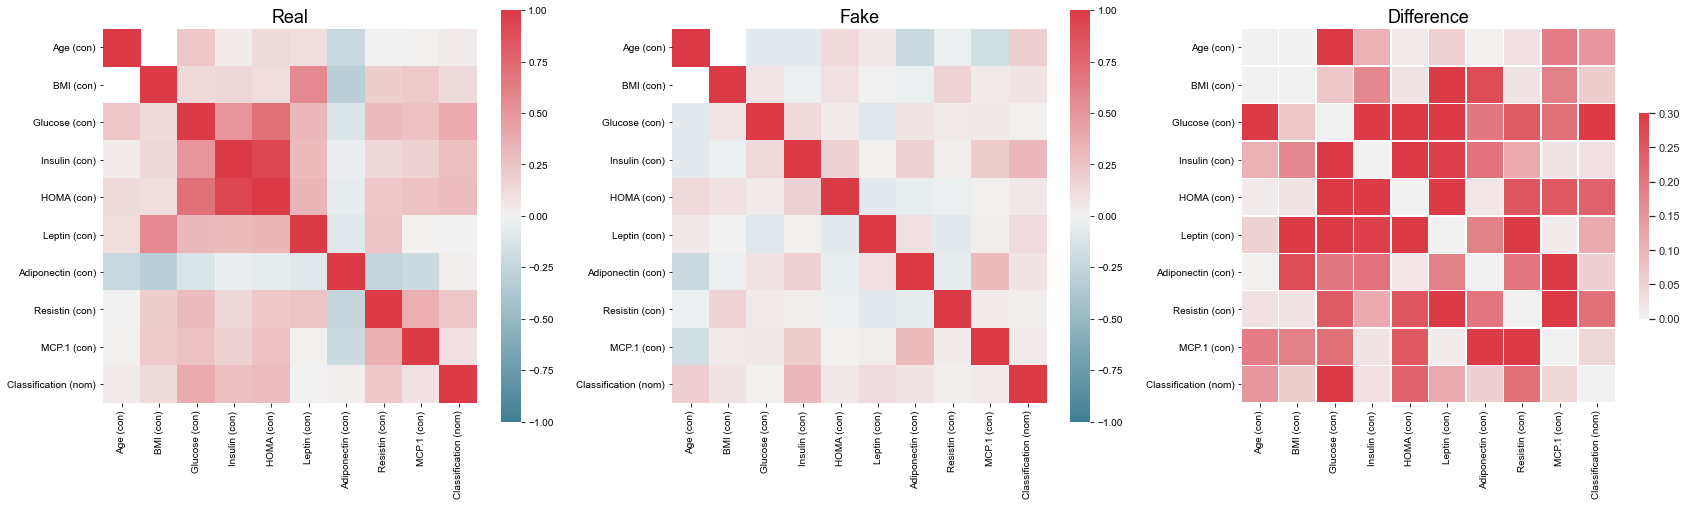

LinAlgError: SVD did not converge

In [10]:
# table-evaluator
from table_evaluator import TableEvaluator
table_evaluator = TableEvaluator(cbc, cbc_synth, cat_cols=cbc_discrete_columns)
table_evaluator.visual_evaluation()

In [11]:
table_evaluator.statistical_evaluation()
table_evaluator.correlation_correlation()
table_evaluator.row_distance()
table_evaluator.column_correlations()
table_evaluator.evaluate("Classification")

0.9675675675675675

0.14034543159389437

(1.845530129663951, 0.7935026605477676)

0.9336270959340233


Correlation metric: pearsonr

Classifier F1-scores and their Jaccard similarities:
                             f1_real  f1_fake  jaccard_similarity
index                                                            
LogisticRegression_real       0.7083   0.5417              0.5000
LogisticRegression_fake       0.6250   0.5417              0.6000
RandomForestClassifier_real   0.6250   0.4167              0.4545
RandomForestClassifier_fake   0.5833   0.4167              0.2632
DecisionTreeClassifier_real   0.7917   0.4167              0.2973
DecisionTreeClassifier_fake   0.5833   0.5000              0.3333
MLPClassifier_real            0.6667   0.4583              0.2973
MLPClassifier_fake            0.5417   0.5000              0.2308

Miscellaneous results:
                                         Result
Column Correlation Distance RMSE         0.2575
Column Correlation distance MAE          0.1861
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                   

{'Basic statistics': 0.9675675675675675,
 'Correlation column correlations': 0.14034543159389437,
 'Mean Correlation between fake and real columns': 0.9336270959340233,
 '1 - MAPE Estimator results': 0.7507950624581816,
 'Similarity Score': 0.6980837893884166}

In [12]:
# other methods....

## Heart Disease Dataset

In [13]:
hd=pd.read_csv("data/processed.cleveland.data")
hd.columns=["age",       
"sex",       
"cp",        
"trestbps",  
"chol",      
"fbs",       
"restecg",   
"thalach",   
"exang",     
"oldpeak",   
"slope",     
"ca",        
"thal",      
"num"]

Description variables:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
        -- Value 1: typical angina 
        -- Value 2: atypical angina 
        -- Value 3: non-anginal pain 
        -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [14]:
hd.shape
hd.dtypes
hd.head(5)
hd_discrete_columns = ['sex',"cp","restecg","fbs","exang","oldpeak","slope","ca","thal","num"]

(302, 14)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0000,1.0000,4.0000,160.0000,286.0000,0.0000,2.0000,108.0000,1.0000,1.5000,2.0000,3.0,3.0,2
1,67.0000,1.0000,4.0000,120.0000,229.0000,0.0000,2.0000,129.0000,1.0000,2.6000,2.0000,2.0,7.0,1
2,37.0000,1.0000,3.0000,130.0000,250.0000,0.0000,0.0000,187.0000,0.0000,3.5000,3.0000,0.0,3.0,0
3,41.0000,0.0000,2.0000,130.0000,204.0000,0.0000,2.0000,172.0000,0.0000,1.4000,1.0000,0.0,3.0,0
4,56.0000,1.0000,2.0000,120.0000,236.0000,0.0000,0.0000,178.0000,0.0000,0.8000,1.0000,0.0,3.0,0


In [15]:
ctgan_model_hd = CTGANSynthesizer()
np.random.seed(42)
torch.manual_seed(42)
ctgan_model_hd.fit(hd, hd_discrete_columns,epochs=500)
hd_synth = ctgan_model_hd.sample(hd.shape[0])
hd_concatenated = pd.concat([hd.assign(dataset='original'), hd_synth.assign(dataset='sinthetic')])
hd_synth.head()

Epoch 1, Loss G: 1.3963, Loss D: 0.0186
Epoch 2, Loss G: 1.4719, Loss D: -0.0189
Epoch 3, Loss G: 1.4273, Loss D: -0.0369
Epoch 4, Loss G: 1.4527, Loss D: -0.0573
Epoch 5, Loss G: 1.4895, Loss D: -0.0693
Epoch 6, Loss G: 1.4470, Loss D: -0.0967
Epoch 7, Loss G: 1.3864, Loss D: -0.1097
Epoch 8, Loss G: 1.4788, Loss D: -0.1218
Epoch 9, Loss G: 1.3355, Loss D: -0.1531
Epoch 10, Loss G: 1.3824, Loss D: -0.2009
Epoch 11, Loss G: 1.3721, Loss D: -0.2591
Epoch 12, Loss G: 1.4025, Loss D: -0.2707
Epoch 13, Loss G: 1.3656, Loss D: -0.3682
Epoch 14, Loss G: 1.2813, Loss D: -0.3690
Epoch 15, Loss G: 1.2588, Loss D: -0.4500
Epoch 16, Loss G: 1.3315, Loss D: -0.4077
Epoch 17, Loss G: 1.2563, Loss D: -0.4703
Epoch 18, Loss G: 1.1879, Loss D: -0.5335
Epoch 19, Loss G: 1.1989, Loss D: -0.5270
Epoch 20, Loss G: 1.2830, Loss D: -0.6068
Epoch 21, Loss G: 1.1143, Loss D: -0.6651
Epoch 22, Loss G: 1.1202, Loss D: -0.5819
Epoch 23, Loss G: 1.0202, Loss D: -0.6368
Epoch 24, Loss G: 1.1309, Loss D: -0.5339
Ep

Epoch 196, Loss G: 0.9333, Loss D: -0.0095
Epoch 197, Loss G: 0.9208, Loss D: 0.0673
Epoch 198, Loss G: 0.9158, Loss D: 0.1738
Epoch 199, Loss G: 0.8022, Loss D: 0.1080
Epoch 200, Loss G: 0.7498, Loss D: 0.0179
Epoch 201, Loss G: 0.7683, Loss D: 0.0716
Epoch 202, Loss G: 0.8995, Loss D: 0.1983
Epoch 203, Loss G: 0.8860, Loss D: -0.0150
Epoch 204, Loss G: 0.7794, Loss D: 0.0831
Epoch 205, Loss G: 0.7235, Loss D: 0.1445
Epoch 206, Loss G: 0.7185, Loss D: 0.1416
Epoch 207, Loss G: 0.7942, Loss D: 0.1111
Epoch 208, Loss G: 0.7245, Loss D: 0.1305
Epoch 209, Loss G: 0.7871, Loss D: 0.0689
Epoch 210, Loss G: 0.7420, Loss D: 0.1786
Epoch 211, Loss G: 0.8538, Loss D: 0.1155
Epoch 212, Loss G: 0.8959, Loss D: 0.1295
Epoch 213, Loss G: 0.8862, Loss D: 0.0551
Epoch 214, Loss G: 0.9380, Loss D: -0.0365
Epoch 215, Loss G: 0.9289, Loss D: 0.1642
Epoch 216, Loss G: 0.9244, Loss D: 0.0382
Epoch 217, Loss G: 0.7978, Loss D: 0.0418
Epoch 218, Loss G: 0.8893, Loss D: -0.0515
Epoch 219, Loss G: 0.7594, Los

Epoch 389, Loss G: 0.4769, Loss D: -0.0366
Epoch 390, Loss G: 0.6755, Loss D: 0.0353
Epoch 391, Loss G: 0.4430, Loss D: 0.0589
Epoch 392, Loss G: 0.4244, Loss D: -0.0151
Epoch 393, Loss G: 0.5521, Loss D: 0.0648
Epoch 394, Loss G: 0.4945, Loss D: 0.0195
Epoch 395, Loss G: 0.5135, Loss D: -0.0763
Epoch 396, Loss G: 0.4610, Loss D: -0.0568
Epoch 397, Loss G: 0.5798, Loss D: 0.0176
Epoch 398, Loss G: 0.5165, Loss D: -0.0612
Epoch 399, Loss G: 0.4787, Loss D: -0.0629
Epoch 400, Loss G: 0.5581, Loss D: -0.1774
Epoch 401, Loss G: 0.4323, Loss D: -0.0485
Epoch 402, Loss G: 0.3518, Loss D: 0.1060
Epoch 403, Loss G: 0.3023, Loss D: 0.0048
Epoch 404, Loss G: 0.4007, Loss D: -0.1133
Epoch 405, Loss G: 0.4879, Loss D: -0.0234
Epoch 406, Loss G: 0.4507, Loss D: 0.0652
Epoch 407, Loss G: 0.5084, Loss D: 0.0518
Epoch 408, Loss G: 0.3023, Loss D: 0.0171
Epoch 409, Loss G: 0.4663, Loss D: -0.0980
Epoch 410, Loss G: 0.4165, Loss D: 0.0935
Epoch 411, Loss G: 0.3982, Loss D: 0.1071
Epoch 412, Loss G: 0.34

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,52.9844,1.0000,4.0000,141.0248,222.3079,0.0000,0.0000,75.5519,1.0000,2.2000,1.0000,0.0,7.0,3
1,70.1356,1.0000,2.0000,105.9240,282.8644,0.0000,0.0000,137.6369,1.0000,0.0000,1.0000,0.0,3.0,1
2,52.9568,0.0000,3.0000,141.2781,229.7363,0.0000,0.0000,172.1262,0.0000,2.4000,1.0000,3.0,3.0,3
3,35.4040,1.0000,3.0000,98.0434,243.9222,0.0000,0.0000,161.2556,0.0000,0.6000,1.0000,2.0,3.0,3
4,54.3965,0.0000,4.0000,100.1797,426.9558,0.0000,2.0000,120.2388,0.0000,0.0000,2.0000,0.0,3.0,0


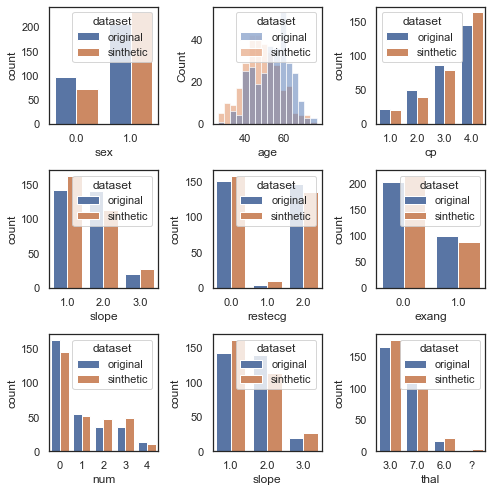

In [16]:
f, axes = plt.subplots(3, 3, figsize=(7, 7))
sns.countplot(x="sex", data=hd_concatenated,hue='dataset',ax=axes[0, 0])
sns.histplot(data=hd_concatenated, x="age", hue="dataset",ax=axes[0, 1])
sns.countplot(x="cp", data=hd_concatenated,hue='dataset',ax=axes[0, 2])
sns.countplot(x="slope", data=hd_concatenated,hue='dataset',ax=axes[1, 0])
sns.countplot(x="restecg", data=hd_concatenated,hue='dataset',ax=axes[1, 1])
sns.countplot(x="exang", data=hd_concatenated,hue='dataset',ax=axes[1, 2])
sns.countplot(x="num", data=hd_concatenated,hue='dataset',ax=axes[2, 0])
sns.countplot(x="slope", data=hd_concatenated,hue='dataset',ax=axes[2, 1])
sns.countplot(x="thal", data=hd_concatenated,hue='dataset',ax=axes[2, 2])
plt.tight_layout()

In [20]:
#sdv evaluation metrics
from sdv.evaluation import evaluate

sdv_hd_eval=evaluate(hd_synth, hd)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [18]:
# table-evaluator
from table_evaluator import TableEvaluator
table_evaluator_hd = TableEvaluator(hd, hd_synth, cat_cols=hd_discrete_columns)
#table_evaluator_hd.visual_evaluation()

In [19]:
table_evaluator_hd.statistical_evaluation()
table_evaluator_hd.correlation_correlation()
table_evaluator_hd.row_distance()
table_evaluator_hd.column_correlations()
table_evaluator_hd.evaluate("num")

0.988235294117647

0.7140924012488347

(2.469982807485893, 0.4191497779108756)

0.8171221292711308


Correlation metric: pearsonr

Classifier F1-scores and their Jaccard similarities:
                             f1_real  f1_fake  jaccard_similarity
index                                                            
LogisticRegression_real       0.5082   0.4590              0.4878
LogisticRegression_fake       0.3770   0.3607              0.3261
RandomForestClassifier_real   0.5410   0.4098              0.3407
RandomForestClassifier_fake   0.3607   0.3279              0.3864
DecisionTreeClassifier_real   0.4754   0.3443              0.1961
DecisionTreeClassifier_fake   0.3607   0.3115              0.1091
MLPClassifier_real            0.4754   0.4426              0.5641
MLPClassifier_fake            0.3934   0.3934              0.6486

Miscellaneous results:
                                         Result
Column Correlation Distance RMSE         0.1136
Column Correlation distance MAE          0.0701
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                   

{'Basic statistics': 0.988235294117647,
 'Correlation column correlations': 0.6984713224676815,
 'Mean Correlation between fake and real columns': 0.8171221292711308,
 '1 - MAPE Estimator results': 0.8806528737097726,
 'Similarity Score': 0.846120404891558}